In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving games.csv to games.csv


# Importación de datos

In [ ]:
# Importar datos base 
import pandas as pd
 
data = pd.read_csv('games.csv')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
df = data[data['blueWardsPlaced'] <= 100 ]
df = df[df['blueTotalMinionsKilled'] > 90 ]

# Modelo original

In [ ]:
variables = ['blueTowersDestroyed', 'blueTotalMinionsKilled', 'blueKills']

db = df[variables]
db.describe()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
count,9770.000000,9770.000000,9770.000000
mean,0.050972,216.749539,6.183009
std,0.242529,21.840651,3.009399
min,0.000000,120.000000,0.000000
25%,0.000000,202.000000,4.000000
50%,0.000000,218.000000,6.000000
75%,0.000000,232.000000,8.000000
max,4.000000,283.000000,22.000000


In [ ]:
pd.crosstab(index=db['blueTowersDestroyed'], columns='count')

col_0,count
blueTowersDestroyed,
0,9314
1,422
2,27
3,6
4,1


In [ ]:
pd.crosstab(index=db['blueTotalMinionsKilled'], columns='count')

col_0,count
blueTotalMinionsKilled,
120,1
123,1
130,1
131,1
136,1
...,...
275,1
276,6
279,2


In [ ]:
pd.crosstab(index=db['blueKills'], columns='count')

col_0,count
blueKills,
0,61
1,309
2,602
3,907
4,1175
5,1291
6,1304
7,1130
8,933



## Rangos de variables

Rangos determinados para los datos:

*   blueTowersDestroyed (del total de 0 a 4)
  - Bajo: 0
  - Alto: 2 - 3 
*   blueTotalMinionsKilled (del total de 120 a 283)
  - Bajo: 120 - 180
  - Alto: 230 - 283
* blueKills (del total de 0 a 22)
  - Bajo: 0 - 5
  - Alto: 10 - 15



## Distribuciones

In [ ]:
from scipy.stats import burr12, nbinom
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [ ]:
# blueTowersDestroyed - Distribución binomial negativa
rT = 0.367067
pT = 0.878068

# blueTotalMinionsKilled parametros - Distribución de Burr
c = 13.3104
d = 3.2474 # k
lamb = 242.896

# blueKills parametros - Distribución binomial negativa
rK = 12.9187
pK = 0.676311

In [ ]:
# blueTowersDestroyed - Distribución binomial negativa
newTowers = nbinom.rvs(rT, pT, size = 1000)

# blueTotalMinionsKilled al azar - Distribución de Burr
newMinions = np.round(burr12.rvs(c, d, scale = lamb, size = 1000), 0)

# BlueKills al azar - Distribución binomial negativa
newKills = nbinom.rvs(rK, pK, size = 1000)

# Generación de partidas de acuerdo a la distribución
# data = {"blueTowersDestroyed": list(nbinom.rvs(rT, pT, size = 1000)),
#        "blueTotalMinionsKilled": list(np.round(burr12.rvs(c, d, scale = lamb, size = 1000), 0)),
#        "blueKills": list(nbinom.rvs(rK, pK, size = 1000))}
#dfNew = pd.DataFrame(data)

# Modelo de predicción

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
features = ['blueTowersDestroyed', 'blueTotalMinionsKilled', 'blueKills']
X = df[features]
Y = df['blueWins']

# Sets de 20% testeo y 80% entrenamiento
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

# Ajustar el modelo
logistic_regressor = LogisticRegression();
logistic_regressor.fit(x_train, y_train);

# Realizar predicciones con set de entrenamiento
y_pred = logistic_regressor.predict(x_test)

# Hacer pruebas y validaciones
score1 = logistic_regressor.score(x_test, y_test)
print('\nAcurracy: ', score1, '\n')

print(classification_report(y_test,y_pred))
print('Mean Absolute Error:', 
      round(metrics.mean_absolute_error(y_test, y_pred), 5))
print('Mean Squared Error:', 
      round(metrics.mean_squared_error(y_test, y_pred), 5))
print('Root Mean Squared Error:', 
      round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 5))


Acurracy:  0.6862845445240532 

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       982
           1       0.69      0.67      0.68       972

    accuracy                           0.69      1954
   macro avg       0.69      0.69      0.69      1954
weighted avg       0.69      0.69      0.69      1954

Mean Absolute Error: 0.31372
Mean Squared Error: 0.31372
Root Mean Squared Error: 0.5601


# * Muestra control: 1000 Partidas nuevas

In [ ]:
# Generación de partidas de acuerdo a la distribución
data = {"blueTowersDestroyed": list(nbinom.rvs(rT, pT, size = 1000)),
        "blueTotalMinionsKilled": list(np.round(burr12.rvs(c, d, scale = lamb, size = 1000), 0)),
        "blueKills": list(nbinom.rvs(rK, pK, size = 1000))}

dfBase = pd.DataFrame(data)

dfBase.describe()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
count,1000.000000,1000.000000,1000.000000
mean,0.061000,215.881000,6.147000
std,0.285237,22.534343,3.107579
min,0.000000,123.000000,0.000000
25%,0.000000,202.000000,4.000000
50%,0.000000,218.000000,6.000000
75%,0.000000,232.000000,8.000000
max,3.000000,277.000000,21.000000


In [ ]:
# Realizar predicciones con nuevos datos
y_pred = logistic_regressor.predict(dfBase)

# Conteo de derrotas(0) y victorias(1)
pd.crosstab(index=y_pred, columns='count')

col_0,count
row_0,
0,519
1,481


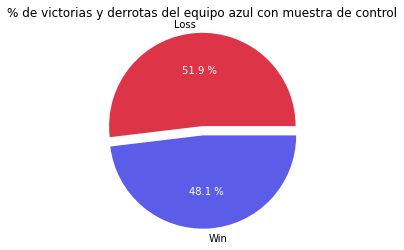

In [ ]:
# Gráfica
count = [np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1)]

_, _, autotexts  = plt.pie(count, labels = ['Loss', 'Win'], autopct="%0.1f %%", 
        colors = ["#dd3447", "#5b5de9"], explode =(0, 0.1))
plt.axis("equal")
# plt.title("% de victorias con rango alto de blueTowers") //M
plt.title("% de victorias y derrotas del equipo azul con muestra de control")

for autotext in autotexts:
    autotext.set_color('white')
plt.show()

# Variable 1 - blueTowers

## Escenario - Rango bajo

Valores para blueTowersDestroyed: 0

In [ ]:
# Generación de 1000 partidas al azar
data = {"blueTowersDestroyed": 0,
        "blueTotalMinionsKilled": list(np.round(burr12.rvs(c, d, scale = lamb, size = 1000), 0)),
        "blueKills": list(nbinom.rvs(rK, pK, size = 1000))}

dfNew = pd.DataFrame(data)

dfNew.describe()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
count,1000.0,1000.000000,1000.000000
mean,0.0,215.490000,6.342000
std,0.0,22.618787,3.103009
min,0.0,120.000000,0.000000
25%,0.0,202.000000,4.000000
50%,0.0,216.000000,6.000000
75%,0.0,231.000000,8.000000
max,0.0,279.000000,23.000000


In [ ]:
dfNew.head()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
0,0,210.0,4
1,0,239.0,8
2,0,239.0,13
3,0,221.0,6
4,0,212.0,9


In [ ]:
# Realizar predicciones con nuevos datos
y_pred = logistic_regressor.predict(dfNew)

# Conteo de derrotas y victorias
pd.crosstab(index=y_pred, columns='count')

col_0,count
row_0,
0,517
1,483


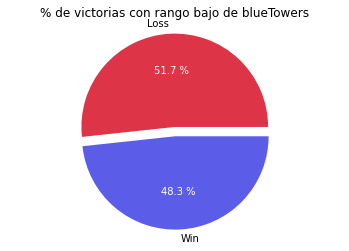

In [ ]:
# Gráfica
count = [np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1)]

_, _, autotexts  = plt.pie(count, labels = ['Loss', 'Win'], autopct="%0.1f %%", 
        colors = ["#dd3447", "#5b5de9"], explode =(0, 0.1))
plt.axis("equal")
plt.title("% de victorias con rango bajo de blueTowers")
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

## Escenario - Rango alto
Valores para blueTowersDestroyed: de 2 a 3

In [ ]:
# Generación de 1000 partidas al azar
data = {"blueTowersDestroyed": list(np.random.randint(low =  2, high = 4,size = 1000)),
        "blueTotalMinionsKilled": list(np.round(burr12.rvs(c, d, scale = lamb, size = 1000), 0)),
        "blueKills": list(nbinom.rvs(rK, pK, size = 1000))}
        
dfNew = pd.DataFrame(data)

dfNew.describe()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
count,1000.000000,1000.000000,1000.000000
mean,2.495000,216.097000,6.188000
std,0.500225,22.796168,3.037084
min,2.000000,125.000000,0.000000
25%,2.000000,201.000000,4.000000
50%,2.000000,218.000000,6.000000
75%,3.000000,232.000000,8.000000
max,3.000000,286.000000,17.000000


In [ ]:
# Realizar predicciones con nuevos datos
y_pred = logistic_regressor.predict(dfNew)

# Conteo de derrotas y victorias
pd.crosstab(index=y_pred, columns='count')

col_0,count
row_0,
0,103
1,897


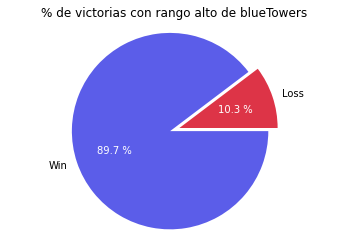

In [ ]:
# Gráfica
count = [np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1)]

_, _, autotexts  = plt.pie(count, labels = ['Loss', 'Win'], autopct="%0.1f %%", 
        colors = ["#dd3447", "#5b5de9"], explode =(0, 0.1))
plt.axis("equal")
plt.title("% de victorias con rango alto de blueTowers")
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

# Variable 2 - blueTotalMinions

## Escenario - Rango bajo

Valores para blueTotalMinions Killed: de 120 a 180

In [ ]:
# Generación de partidas de acuerdo a la distribución
data = {"blueTowersDestroyed": list(nbinom.rvs(rT, pT, size = 1000)),
        "blueTotalMinionsKilled": list(np.random.randint(low = 120, high = 181,size = 1000)),
        "blueKills": list(nbinom.rvs(rK, pK, size = 1000))}

dfNew = pd.DataFrame(data)

dfNew.describe()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
count,1000.000000,1000.000000,1000.000000
mean,0.039000,149.840000,6.087000
std,0.203766,17.860891,3.099199
min,0.000000,120.000000,0.000000
25%,0.000000,134.000000,4.000000
50%,0.000000,150.000000,6.000000
75%,0.000000,166.000000,8.000000
max,2.000000,180.000000,20.000000


In [ ]:
# Realizar predicciones con nuevos datos
y_pred = logistic_regressor.predict(dfNew)

# Conteo de derrotas y victorias
pd.crosstab(index=y_pred, columns='count')

col_0,count
row_0,
0,951
1,49


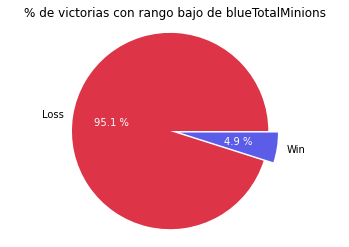

In [ ]:
# Gráfica
count = [np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1)]

_, _, autotexts  = plt.pie(count, labels = ['Loss', 'Win'], autopct="%0.1f %%", 
        colors = ["#dd3447", "#5b5de9"], explode =(0, 0.1))
plt.axis("equal")
plt.title("% de victorias con rango bajo de blueTotalMinions")
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

## Escenario - Rango alto

Valores para blueTotalMinionsKilled: de 230 a 283

In [ ]:
# Generación de partidas de acuerdo a la distribución
data = {"blueTowersDestroyed": list(nbinom.rvs(rT, pT, size = 1000)),
        "blueTotalMinionsKilled": list(np.random.randint(low = 230, high = 284,size = 1000)),
        "blueKills": list(nbinom.rvs(rK, pK, size = 1000))}

dfNew = pd.DataFrame(data)

dfNew.describe()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
count,1000.000000,1000.000000,1000.000000
mean,0.043000,256.312000,6.175000
std,0.212594,15.737927,3.005563
min,0.000000,230.000000,0.000000
25%,0.000000,243.000000,4.000000
50%,0.000000,256.000000,6.000000
75%,0.000000,270.000000,8.000000
max,2.000000,283.000000,18.000000


In [ ]:
# Realizar predicciones con nuevos datos
y_pred = logistic_regressor.predict(dfNew)

# Conteo de derrotas y victorias
pd.crosstab(index=y_pred, columns='count')

col_0,count
row_0,
0,134
1,866


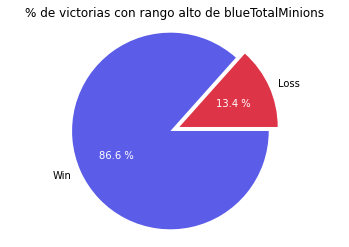

In [ ]:
# Gráfica
count = [np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1)]

_, _, autotexts  = plt.pie(count, labels = ['Loss', 'Win'], autopct="%0.1f %%", 
        colors = ["#dd3447", "#5b5de9"], explode =(0, 0.1))
plt.axis("equal")
plt.title("% de victorias con rango alto de blueTotalMinions")
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

# Variable 3 - blueKills

## Escenario - Rango bajo
Valores para blueKills: de 0 a 5

In [ ]:
# Generación de partidas de acuerdo a la distribución
data = {"blueTowersDestroyed": list(nbinom.rvs(rT, pT, size = 1000)),
        "blueTotalMinionsKilled": list(np.round(burr12.rvs(c, d, scale = lamb, size = 1000), 0)),
        "blueKills": list(np.random.randint(low = 0, high = 6,size = 1000))}

dfNew = pd.DataFrame(data)

dfNew.describe()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
count,1000.000000,1000.000000,1000.000000
mean,0.041000,217.198000,2.503000
std,0.203372,21.825378,1.702613
min,0.000000,139.000000,0.000000
25%,0.000000,204.000000,1.000000
50%,0.000000,219.000000,2.000000
75%,0.000000,232.000000,4.000000
max,2.000000,279.000000,5.000000


In [ ]:
# Realizar predicciones con nuevos datos
y_pred = logistic_regressor.predict(dfNew)

# Conteo de derrotas y victorias
pd.crosstab(index=y_pred, columns='count')

col_0,count
row_0,
0,913
1,87


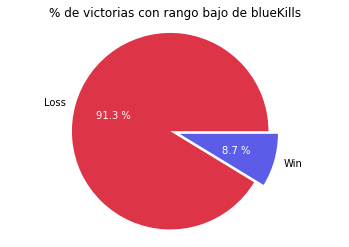

In [ ]:
# Gráfica
count = [np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1)]

_, _, autotexts  = plt.pie(count, labels = ['Loss', 'Win'], autopct="%0.1f %%", 
        colors = ["#dd3447", "#5b5de9"], explode =(0, 0.1))
plt.axis("equal")
plt.title("% de victorias con rango bajo de blueKills")
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

## Escenario - Rango alto
Valores para blueKills: de 10 a 15

In [ ]:
# Generación de partidas de acuerdo a la distribución
data = {"blueTowersDestroyed": list(nbinom.rvs(rT, pT, size = 1000)),
        "blueTotalMinionsKilled": list(np.round(burr12.rvs(c, d, scale = lamb, size = 1000), 0)),
        "blueKills": list(np.random.randint(low = 10, high = 16,size = 1000))}

dfNew = pd.DataFrame(data)

dfNew.describe()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
count,1000.000000,1000.000000,1000.000000
mean,0.042000,215.927000,12.347000
std,0.241442,21.776682,1.683278
min,0.000000,127.000000,10.000000
25%,0.000000,203.000000,11.000000
50%,0.000000,217.000000,12.000000
75%,0.000000,230.000000,14.000000
max,3.000000,283.000000,15.000000


In [ ]:
dfNew.head()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
0,0,219.0,15
1,0,267.0,10
2,0,183.0,13
3,0,205.0,14
4,0,241.0,14


In [ ]:
# Realizar predicciones con nuevos datos
y_pred = logistic_regressor.predict(dfNew)

# Conteo de derrotas y victorias
pd.crosstab(index=y_pred, columns='count')

col_0,count
row_0,
0,17
1,983


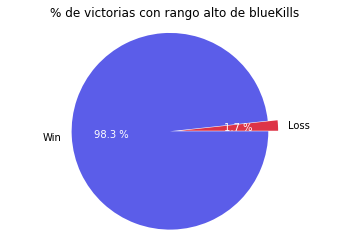

In [ ]:
# Gráfica
count = [np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1)]

_, _, autotexts  = plt.pie(count, labels = ['Loss', 'Win'], autopct="%0.1f %%", 
        colors = ["#dd3447", "#5b5de9"], explode =(0, 0.1))
plt.axis("equal")
plt.title("% de victorias con rango alto de blueKills")
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

# 2 Variables al mismo tiempo

## Alto blueKill y bajo blueTotalMinions

In [ ]:
# Generación de partidas de acuerdo a la distribución
data = {"blueTowersDestroyed": list(nbinom.rvs(rT, pT, size = 1000)),
        "blueTotalMinionsKilled": list(np.random.randint(low = 120, high = 181,size = 1000)),
        "blueKills": list(np.random.randint(low = 10, high = 16,size = 1000))}

dfNew = pd.DataFrame(data)

dfNew.describe()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
count,1000.000000,1000.000000,1000.000000
mean,0.044000,150.879000,12.499000
std,0.219345,17.531449,1.718998
min,0.000000,120.000000,10.000000
25%,0.000000,136.000000,11.000000
50%,0.000000,151.000000,12.000000
75%,0.000000,166.000000,14.000000
max,2.000000,180.000000,15.000000


In [ ]:
dfNew.head()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
0,0,174,10
1,0,143,15
2,0,144,15
3,0,132,12
4,0,158,15


col_0  count
row_0       
0        498
1        502


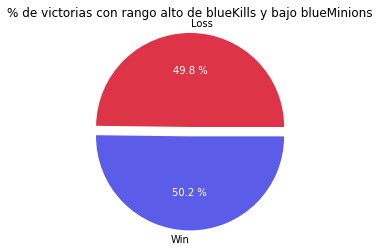

In [ ]:
# Realizar predicciones con nuevos datos
y_pred = logistic_regressor.predict(dfNew)

# Conteo de derrotas y victorias
print(pd.crosstab(index=y_pred, columns='count'))
count = [np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1)]

_, _, autotexts  = plt.pie(count, labels = ['Loss', 'Win'], autopct="%0.1f %%", 
        colors = ["#dd3447", "#5b5de9"], explode =(0, 0.1))
plt.axis("equal")
plt.title("% de victorias con rango alto de blueKills y bajo blueMinions")
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

## Alto blueKill y bajo blueTowers

In [ ]:
# Generación de partidas de acuerdo a la distribución
data = {"blueTowersDestroyed": 0,
        "blueTotalMinionsKilled": list(np.round(burr12.rvs(c, d, scale = lamb, size = 1000), 0)),
        "blueKills": list(np.random.randint(low = 10, high = 16,size = 1000))}

dfNew = pd.DataFrame(data)

dfNew.describe()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
count,1000.0,1000.000000,1000.000000
mean,0.0,215.965000,12.525000
std,0.0,22.899654,1.707715
min,0.0,139.000000,10.000000
25%,0.0,203.000000,11.000000
50%,0.0,217.000000,13.000000
75%,0.0,231.000000,14.000000
max,0.0,318.000000,15.000000


In [ ]:
dfNew.head()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
0,0,243.0,15
1,0,204.0,10
2,0,174.0,10
3,0,261.0,11
4,0,226.0,12


col_0  count
row_0       
0         20
1        980


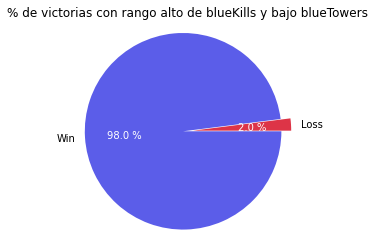

In [ ]:
# Realizar predicciones con nuevos datos
y_pred = logistic_regressor.predict(dfNew)

# Conteo de derrotas y victorias
print(pd.crosstab(index=y_pred, columns='count'))
count = [np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1)]

_, _, autotexts  = plt.pie(count, labels = ['Loss', 'Win'], autopct="%0.1f %%", 
        colors = ["#dd3447", "#5b5de9"], explode =(0, 0.1))
plt.axis("equal")
plt.title("% de victorias con rango alto de blueKills y bajo blueTowers")
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

## Ato blueKills y bajo blueTowers y blueMinions

In [ ]:
# Generación de partidas de acuerdo a la distribución
data = {"blueTowersDestroyed": 0,
        "blueTotalMinionsKilled": list(np.random.randint(low = 120, high = 181,size = 1000)),
        "blueKills": list(np.random.randint(low = 10, high = 16,size = 1000))}

dfNew = pd.DataFrame(data)

dfNew.describe()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
count,1000.0,1000.000000,1000.000000
mean,0.0,149.901000,12.505000
std,0.0,17.871782,1.678926
min,0.0,120.000000,10.000000
25%,0.0,134.000000,11.000000
50%,0.0,150.000000,12.000000
75%,0.0,166.000000,14.000000
max,0.0,180.000000,15.000000


In [ ]:
dfNew.head()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
0,0,154,11
1,0,174,11
2,0,176,10
3,0,178,13
4,0,168,11


col_0  count
row_0       
0        534
1        466


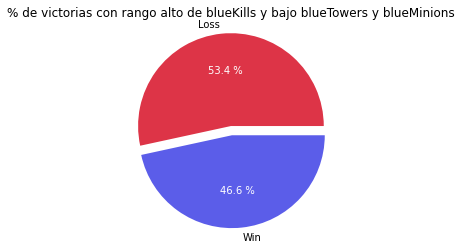

In [ ]:
# Realizar predicciones con nuevos datos
y_pred = logistic_regressor.predict(dfNew)

# Conteo de derrotas y victorias
print(pd.crosstab(index=y_pred, columns='count'))
count = [np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1)]

_, _, autotexts  = plt.pie(count, labels = ['Loss', 'Win'], autopct="%0.1f %%", 
       colors = ["#dd3447", "#5b5de9"], explode =(0, 0.1))
plt.axis("equal")
plt.title("% de victorias con rango alto de blueKills y bajo blueTowers y blueMinions")
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

## Alto blueMinions y bajo blueKills

In [ ]:
# Generación de partidas de acuerdo a la distribución
data = {"blueTowersDestroyed": list(nbinom.rvs(rT, pT, size = 1000)),
        "blueTotalMinionsKilled": list(np.random.randint(low = 230, high = 284,size = 1000)),
        "blueKills": list(np.random.randint(low = 0, high = 6,size = 1000))}

dfNew = pd.DataFrame(data)

dfNew.describe()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
count,1000.000000,1000.000000,1000.000000
mean,0.045000,256.783000,2.523000
std,0.230278,15.767007,1.733342
min,0.000000,230.000000,0.000000
25%,0.000000,243.000000,1.000000
50%,0.000000,257.000000,3.000000
75%,0.000000,271.000000,4.000000
max,3.000000,283.000000,5.000000


In [ ]:
dfNew.head()

,blueTowersDestroyed,blueTotalMinionsKilled,blueKills
0,0,262,0
1,0,281,4
2,0,266,3
3,0,282,4
4,0,275,2


col_0  count
row_0       
0        463
1        537


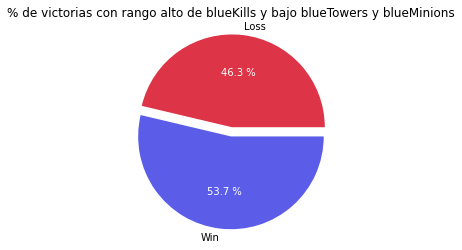

In [ ]:
# Realizar predicciones con nuevos datos
y_pred = logistic_regressor.predict(dfNew)

# Conteo de derrotas y victorias
print(pd.crosstab(index=y_pred, columns='count'))
count = [np.count_nonzero(y_pred == 0), np.count_nonzero(y_pred == 1)]

_, _, autotexts  = plt.pie(count, labels = ['Loss', 'Win'], autopct="%0.1f %%", 
       colors = ["#dd3447", "#5b5de9"], explode =(0, 0.1))
plt.axis("equal")
plt.title("% de victorias con rango alto de blueMinions y bajo blueKills")
for autotext in autotexts:
    autotext.set_color('white')
plt.show()